<a href="https://colab.research.google.com/github/manideepika-30/DAV-PROJECT/blob/main/DAV_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-2796048251.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Layoff_Date': pd.date_range(start='2022-01-01', periods=16, freq='3M')


✅ Files saved successfully:
- software_layoffs_data.xlsx
- software_layoffs_data.csv

--- DATASET INFO ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Company             16 non-null     object        
 1   Job_Role            16 non-null     object        
 2   Employees_Laid_Off  16 non-null     int64         
 3   Layoff_Date         16 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 644.0+ bytes
None

--- SUMMARY STATISTICS ---
       Company           Job_Role  Employees_Laid_Off          Layoff_Date
count       16                 16           16.000000                   16
unique       8                  7                 NaN                  NaN
top     Google  Software Engineer                 NaN                  NaN
freq         2                  4               

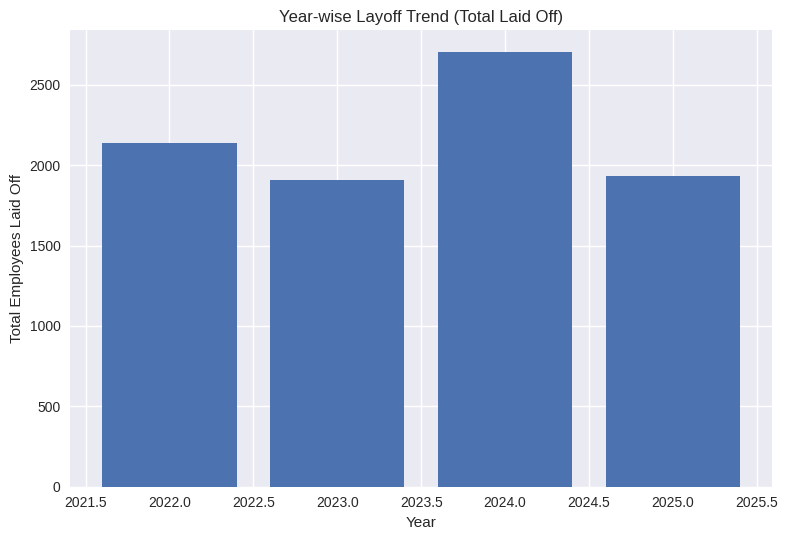

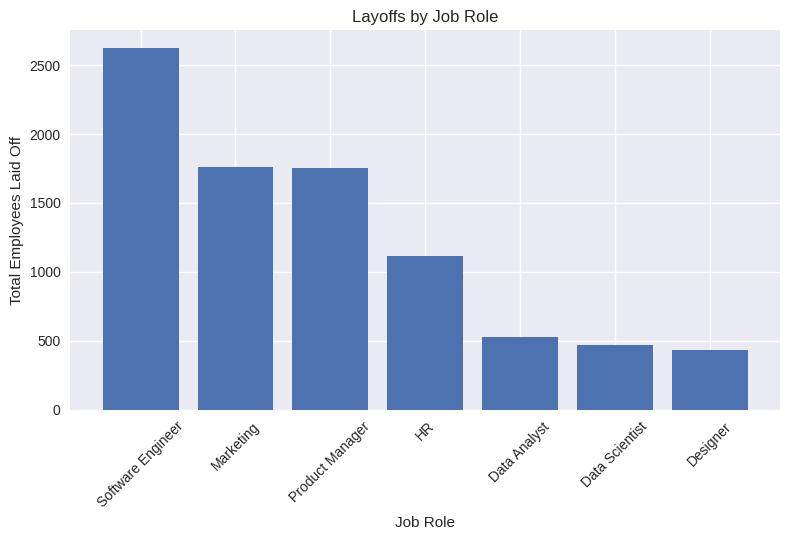

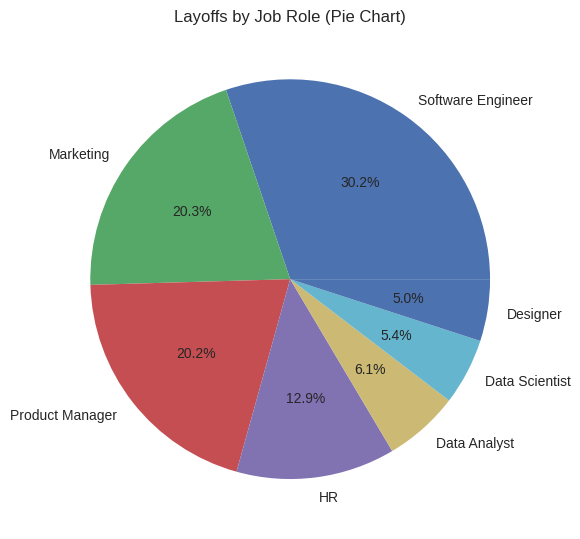

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# -----------------------------
# 1. Create Sample Dataset
# -----------------------------
data = {
    'Company': ['Google', 'Microsoft', 'Meta', 'Amazon', 'Netflix', 'Twitter', 'Uber', 'Salesforce'] * 2,
    'Job_Role': ['Software Engineer', 'Data Scientist', 'Product Manager', 'Software Engineer',
                 'HR', 'Marketing', 'Data Analyst', 'Designer'] * 2,
    'Employees_Laid_Off': np.random.randint(50, 1000, 16),
    'Layoff_Date': pd.date_range(start='2022-01-01', periods=16, freq='3M')
}

df = pd.DataFrame(data)

# -----------------------------
# 2. Save as Excel + CSV
# -----------------------------
excel_filename = "software_layoffs_data.xlsx"
csv_filename = "software_layoffs_data.csv"

df.to_excel(excel_filename, index=False)
df.to_csv(csv_filename, index=False)

print(f"✅ Files saved successfully:\n- {excel_filename}\n- {csv_filename}")

# -----------------------------
# 3. Load the dataset
# -----------------------------
df = pd.read_excel(excel_filename)

# -----------------------------
# 4. EDA Summary and Null Check
# -----------------------------
print("\n--- DATASET INFO ---")
print(df.info())

print("\n--- SUMMARY STATISTICS ---")
print(df.describe(include='all'))

print("\n--- NULL VALUES ---")
print(df.isnull().sum())

# -----------------------------
# 5. Convert Layoff_Date to datetime and extract year
# -----------------------------
df['Layoff_Date'] = pd.to_datetime(df['Layoff_Date'], errors='coerce')
df['Year'] = df['Layoff_Date'].dt.year

# -----------------------------
# 6. Year-wise Layoffs (Bar Chart)
# -----------------------------
yearly = df.groupby('Year')['Employees_Laid_Off'].sum().reset_index()

plt.figure()
plt.bar(yearly['Year'], yearly['Employees_Laid_Off'])
plt.title('Year-wise Layoff Trend (Total Laid Off)')
plt.xlabel('Year')
plt.ylabel('Total Employees Laid Off')
plt.tight_layout()
plt.show()

# -----------------------------
# 7. Layoffs by Job Role (Bar Chart)
# -----------------------------
role_ct = df.groupby('Job_Role')['Employees_Laid_Off'].sum().sort_values(ascending=False).reset_index()

plt.figure()
plt.bar(role_ct['Job_Role'], role_ct['Employees_Laid_Off'])
plt.title('Layoffs by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Total Employees Laid Off')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# -----------------------------
# 8. Layoffs by Job Role (Pie Chart)
# -----------------------------
plt.figure()
plt.pie(role_ct['Employees_Laid_Off'], labels=role_ct['Job_Role'], autopct='%1.1f%%')
plt.title('Layoffs by Job Role (Pie Chart)')
plt.tight_layout()
plt.show()
